In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2

(480, 800, 3)


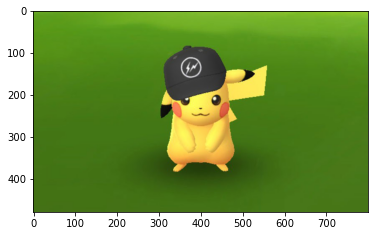

In [11]:
img = cv2.imread('pikachu.jpg') #Reads the image in BGR format so we need to convert it in RGB to view original image.
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
original_shape = img.shape
print(original_shape)
plt.imshow(img)
plt.show()

In [12]:
## Flatten each channel of the image
flat_pixels = img.reshape((-1,3)) # basically it converts all the image channels into a linear array (720*1280 = 921600)
print(flat_pixels.shape)

(384000, 3)


In [13]:
from sklearn.cluster import KMeans

In [14]:
# Suppose, we want five dominant colours
dom_colors = 5
kmeans = KMeans(n_clusters=dom_colors)
kmeans.fit(flat_pixels)

KMeans(n_clusters=5)

In [15]:
centers=kmeans.cluster_centers_

In [16]:
centers = np.array(centers,dtype='uint8')
print(centers)

[[ 68 117  21]
 [242 204  82]
 [115 175  40]
 [ 52  63  38]
 [ 84 144  25]]


###### Plotting and trying to identify all these colours

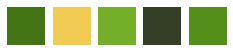

In [17]:
i = 1
plt.figure(0,figsize=(8,3))

colors = []
for each_color in centers:
    plt.subplot(1,10,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_color)
    
    # Color swatch
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_color
    plt.imshow(a)

plt.show()

### Segmenting our original image

In [21]:
new_img = np.zeros((480*800,3),dtype='uint8')
print(new_img.shape)

(384000, 3)


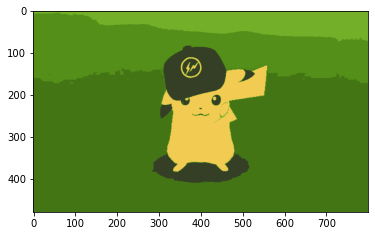

In [22]:
for i in range(new_img.shape[0]):
    new_img[i] = colors[kmeans.labels_[i]]
    
new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()